In [1]:
import os
import cv2

In [2]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x_train = []
y_train = []
x_test = []
y_test = []
flower_mapping = {'daisy':0, 'dandelion':1, 'rose':2, 'sunflower':3, 'tulip':4}

In [4]:
def read_directory(name, x_arr, y_arr):
    for filename in os.listdir(r"./train/"+name):
        img = cv2.imread("./train/"+name + "/" + filename)
        x_arr.append(img)
        y_arr.append(flower_mapping[name])

def test_read_directory(name, x_arr):
    for filename in os.listdir(r"./test/"):
        img = cv2.imread("./test/" + filename)
        x_arr.append(img)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    )

In [5]:
flower_name = ["daisy", "dandelion", "rose", "sunflower", "tulip"]
for name in flower_name:
    read_directory(name, x_train, y_train)

In [6]:
test_read_directory(name, x_test)

In [7]:
import random 
random.Random(7).shuffle(x_train)
random.Random(7).shuffle(y_train)

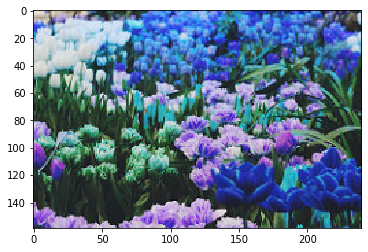

In [17]:
plt.imshow(x_train[5])
plt.show()

In [6]:


import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras import layers
from keras import activations
from keras.models import Model
#from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator



In [28]:
DATASET_PATH  = './train/'
TEST_PATH = './test/'
OUTPUT_PATH = './working/'
NUM_CLASSES = 5
NUM_EPOCHS = 32
SEED = 77
# saved model
#WEIGHTS_FINAL = 'model-InceptionResNetV2.h5'

#categories=os.listdir(DATASET_PATH)

In [29]:
train_datagen = ImageDataGenerator(rotation_range=30, width_shift_range=0.125, height_shift_range=0.125, zoom_range=0.125, horizontal_flip=True,
                                   validation_split=0.2, rescale=1. / 255)
train_batches = train_datagen.flow_from_directory(DATASET_PATH, subset = 'training', seed = SEED)
valid_batches = train_datagen.flow_from_directory(DATASET_PATH, subset = 'validation', seed = SEED)
for cls, idx in train_batches.class_indices.items():
    print('Class #{} = {}'.format(idx, cls))

Found 2260 images belonging to 5 classes.
Found 563 images belonging to 5 classes.
Class #0 = daisy
Class #1 = dandelion
Class #2 = rose
Class #3 = sunflower
Class #4 = tulip


In [30]:

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',
                           input_shape=(256,256,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation= 'relu'))
model.add(layers.Dense(5, activation='softmax'))
model.compile(optimizer=RMSprop(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

219062272/219055592 [==============================] - 34s 0us/step


In [ ]:
model.fit_generator(train_batches, validation_data = valid_batches, epochs = NUM_EPOCHS)
# Store Model
#net_final.save(WEIGHTS_FINAL)


Epoch 1/32


In [ ]:


from keras.preprocessing import image
out = np.array(['id', 'flower_class'])
testfiles=os.listdir(TEST_PATH)
for testfile in testfiles:
    filename = testfile.split('.')[0]
    img = image.load_img(TEST_PATH+'/'+testfile,target_size=(256, 256))
    if img is None:
        continue
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x = x /255.
    pred = net_final.predict(x)[0]
    tof=np.argmax(pred)
    out = np.vstack((out,[filename, tof]))

pd.DataFrame(out).to_csv(OUTPUT_PATH+'/prediction.csv',index=False,header=False)

